In [1]:
%load_ext watermark
%watermark

2019-05-17T17:18:04+02:00

CPython 3.6.5
IPython 6.4.0

compiler   : GCC 7.2.0
system     : Linux
release    : 5.0.13-arch1-1-ARCH
machine    : x86_64
processor  : 
CPU cores  : 4
interpreter: 64bit


# VISUALIZACIÓN DE DATOS AVANZADA
En este capitulo se trataran los métodos para poder personalizar las gráficas de Matplotlib y como cargar Estilos ya predefinidos.
Además se realizaran ejemplos con otras librerías interesantes para la visualización de datos:
- IPyWidgets.
- Cartopy.
- Seaborn.
- BokehJS

## Carga de Datos y Preparacion de DataSet
Como en el apartado de visualización básica de datos utilizaremos el Boston Housing Dataset. Recopilado en 1976 y publicado en [Berkeley](https://www.law.berkeley.edu/files/Hedonic.PDF)


In [2]:
import pandas as pd
df = pd.read_csv("boston_dataset.csv")

#renombramos las variables 
df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### Personalización de Gráficos
Mediante los metodos de la librería **PyPlot** de **MatplotLib** veremos como especifciar titulos para los gráficos y como personalizar la forma de los punteros en gráficos, su tamaño y su color.

In [3]:
%matplotlib notebook

In [4]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


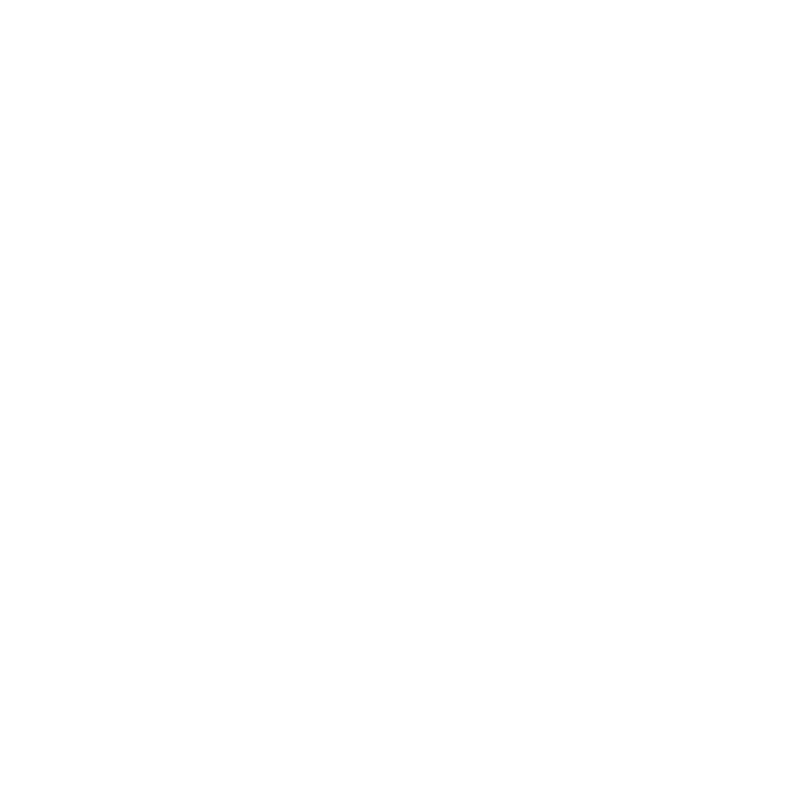

Text(0,0.5,'Valor mediano de las viviendas ($1000s)')

In [5]:
#Cambiamos el punto con marker, color y el tamanio tan solo llamando a los parametros
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="pink", figsize=(8,8))

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

Damos un tamanio para las figuras por defecto en las librerias

In [6]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8,8)

<IPython.core.display.Javascript object>


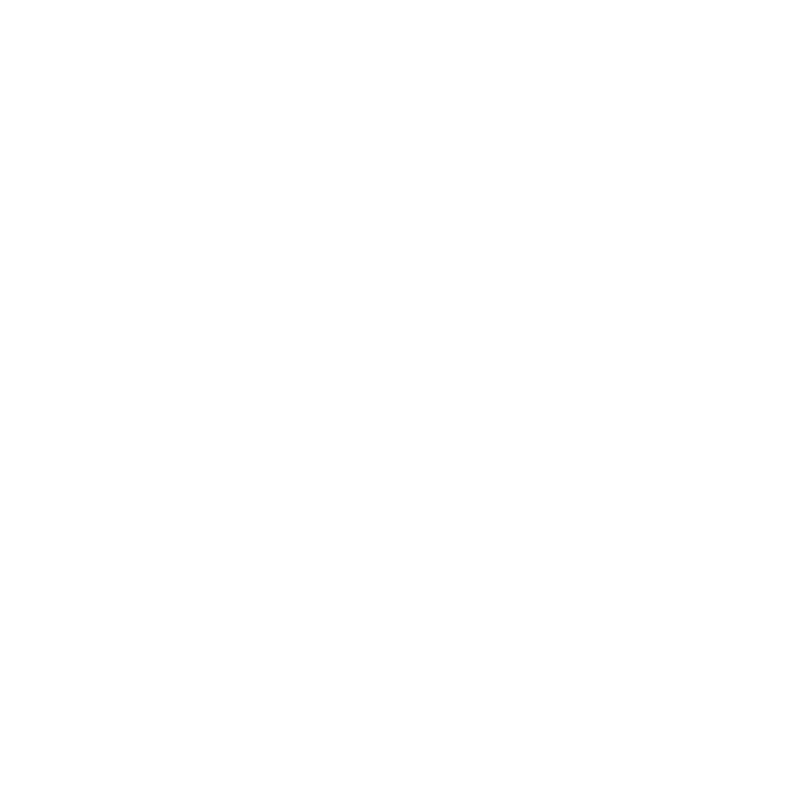

Text(0,0.5,'Valor mediano de las viviendas ($1000s)')

In [7]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="pink")

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

### Establecer estilos en Matplotlib
Por defecto Matplotlib tiene un estilo definido, un aspecto muy característico y facilmente reconocible. Pero también permite personalizar los estilos de gráficas de una forma muy sencilla, utilizando hojas de estilos predefinidas y que vienen incluidas con Matplotlib

In [8]:
#mostramos la lista disponible de estilos en pyplot.
plt.style.available

['fivethirtyeight',
 'bmh',
 'seaborn-talk',
 'seaborn-notebook',
 'seaborn',
 'seaborn-whitegrid',
 'ggplot',
 'tableau-colorblind10',
 'dark_background',
 'seaborn-deep',
 '_classic_test',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'seaborn-poster',
 'grayscale',
 'seaborn-dark',
 'seaborn-paper',
 'fast',
 'seaborn-pastel',
 'seaborn-white',
 'seaborn-ticks',
 'classic',
 'seaborn-bright',
 'Solarize_Light2',
 'seaborn-muted',
 'seaborn-dark-palette']

Podemos encontrar mas estilos [aqui]("https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html")

In [9]:
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>


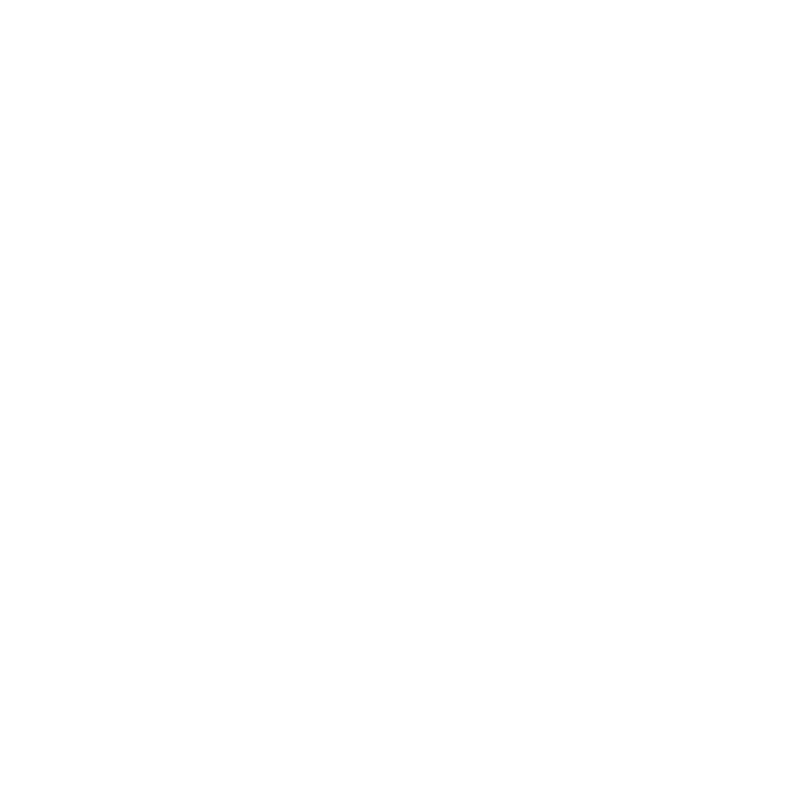

Text(0,0.5,'Valor mediano de las viviendas ($1000s)')

In [10]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO")

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

## IPyWidgets

[IpyWidgets](https://ipywidgets.readthedocs.io/en/stable/) es una librería que nos permite importar widgets FrontEnd para poder interactuar con las gráficos.
Podemos invocarlo con interact.

In [11]:
from ipywidgets import interact

In [12]:
#creamos la funcion grafico varible para comparar la columna 1 seleccionable desde el ComboBox con el Valor Mediano
@interact(col1=df.columns.tolist())
def grafico_variable(col1):
    df.plot.scatter(x=col1, y="VALOR_MEDIANO")
    plt.title("{} vs VALOR_MEDIANO".format(col1))

interactive(children=(Dropdown(description='col1', options=('CIUDAD', 'LON', 'LAT', 'VALOR_MEDIANO', 'INDICE_C…

In [13]:
#Indicamos a matplotlib que estamos trabajando con notebook para que se reescale mejor.
%matplotlib notebook

<IPython.core.display.Javascript object>


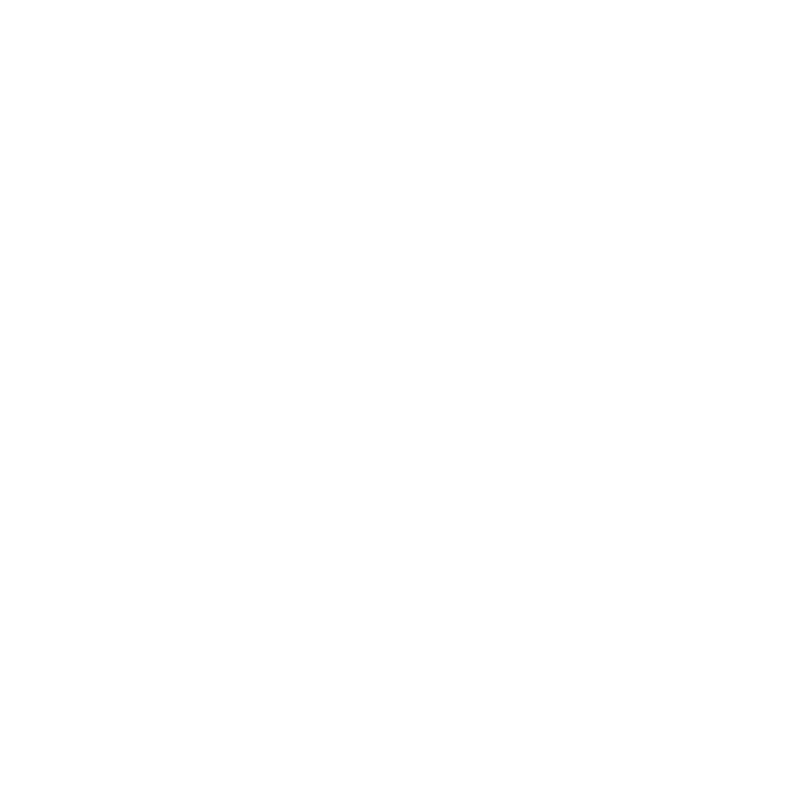

In [14]:
df.plot.scatter(x="LON", y="LAT")

## Cartopy
[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) es una librería diseñada para procesar datos geoespaciales en orden para "plottear" mapas y poder realizar analisis de datos.


In [49]:
import cartopy.crs as ccrs

from cartopy.io import img_tiles

ModuleNotFoundError: No module named 'cartopy'

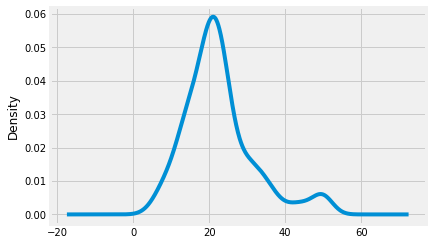

In [45]:
df.VALOR_MEDIANO.plot.kde()

In [46]:
primer_quintil = df.VALOR_MEDIANO.quantile(0.2)
primer_quintil

15.3

In [47]:
cuarto_quintil = df.VALOR_MEDIANO.quantile(0.8)
cuarto_quintil

28.2

In [48]:
imagery = img_tiles.GoogleTiles()


ax = plt.axes(projection=imagery.crs)

limites_mapa = (-71.38 ,-70.77,42.03 , 42.47)

ax.set_extent(limites_mapa)

ax.add_image(imagery, 10)

df_primer_qt = df[df.VALOR_MEDIANO<primer_quintil]

df_tercer_qt = df[df.VALOR_MEDIANO>cuarto_quintil]


plt.plot(df_primer_qt.LON, df_primer_qt.LAT, transform=ccrs.Geodetic(), marker=".",
         markersize=10, color="red", linewidth=0, alpha=0.5)

plt.plot(df_tercer_qt.LON, df_primer_qt.LAT, transform=ccrs.Geodetic(), marker=".",
         markersize=10, color="green", linewidth=0, alpha=0.5)

plt.show()

NameError: name 'img_tiles' is not defined

## Seaborn 
Basada en matplotlib, se usa para hacer más atractivos los gráficos e información estadística en Python. Su objetivo es darle una mayor relevancia a las visualizaciones, dentro  de las tareas de exploración e interpretación de los datos.

In [24]:
import seaborn as sns

In [25]:
#especificamos a matplotlib para incluir los gráficos en el notebook
%matplotlib inline

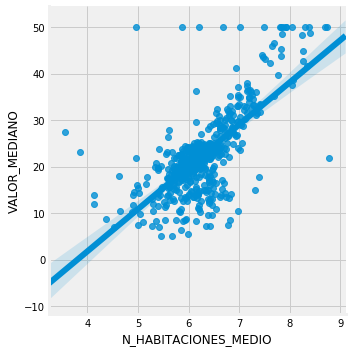

In [26]:
sns.lmplot(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", data=df)

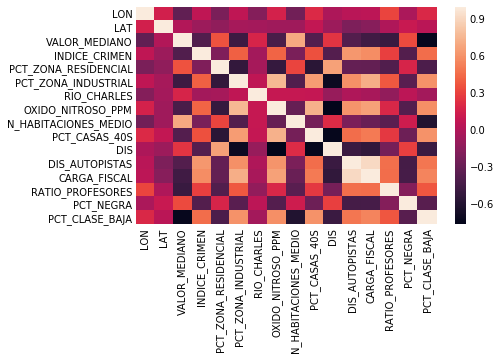

In [27]:
sns.heatmap(df.corr())

## BokehJS
[BokehJS](https://bokeh.pydata.org/en/latest/docs/dev_guide/bokehjs.html) es una librería que nos permitirá realizar graficas pensadas para mostrar gráficos en un navegador.
Bokeh es una librería para visualizaciones interactivas diseñada para funcionar en los navegadores web modernos. Su objetivo es proporcionar una construcción elegante y concisa de gráficos modernos al estilo de D3.js, y para ampliar esta capacidad con la interactividad y buen rendimiento sobre grandes volúmenes de datos. Bokeh puede ayudar a cualquier persona a crear en forma rápida y sencilla gráficos interactivos, dashboards y aplicaciones de datos

In [28]:
import bokeh.plotting as bk

bk.output_notebook()

Loading BokehJS ...

In [29]:
df.INDICE_CRIMEN

0       0.00632
1       0.02731
2       0.02729
3       0.03237
4       0.06905
5       0.02985
6       0.08829
7       0.14455
8       0.21124
9       0.17004
10      0.22489
11      0.11747
12      0.09378
13      0.62976
14      0.63796
15      0.62739
16      1.05393
17      0.78420
18      0.80271
19      0.72580
20      1.25179
21      0.85204
22      1.23247
23      0.98843
24      0.75026
25      0.84054
26      0.67191
27      0.95577
28      0.77299
29      1.00245
         ...   
476     4.87141
477    15.02340
478    10.23300
479    14.33370
480     5.82401
481     5.70818
482     5.73116
483     2.81838
484     2.37857
485     3.67367
486     5.69175
487     4.83567
488     0.15086
489     0.18337
490     0.20746
491     0.10574
492     0.11132
493     0.17331
494     0.27957
495     0.17899
496     0.28960
497     0.26838
498     0.23912
499     0.17783
500     0.22438
501     0.06263
502     0.04527
503     0.06076
504     0.10959
505     0.04741
Name: INDICE_CRIMEN, Len

In [30]:
df["CRIMEN_QUINTIL"] = pd.qcut(df.INDICE_CRIMEN, 5)

In [31]:
df.CRIMEN_QUINTIL.cat.categories

IntervalIndex([(0.00532, 0.0642], (0.0642, 0.15], (0.15, 0.55], (0.55, 5.581], (5.581, 88.976]],
              closed='right',
              dtype='interval[float64]')

In [32]:
from bokeh.palettes import brewer

colors = brewer["Spectral"][len(df.CRIMEN_QUINTIL.unique())]
colors

['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c']

In [33]:
p = bk.figure(
plot_width=600,
    plot_height=600,
    title="Habitaciones vs Valor vivienda vs crimen"
)

for i, quintil in enumerate(df.CRIMEN_QUINTIL.cat.categories):
    df_q = df[df.CRIMEN_QUINTIL==quintil]
    p.scatter(df_q.N_HABITACIONES_MEDIO, df_q.VALOR_MEDIANO, color=colors[i],
             legend="({}-{})".format(quintil.left, quintil.right)
             )
    
bk.show(p);

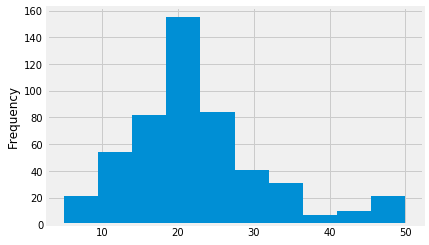

In [34]:
df.VALOR_MEDIANO.plot.hist()

In [35]:
import numpy as np

hist, edges = np.histogram(df.VALOR_MEDIANO, bins=20)

In [36]:
hist

array([ 9, 12, 18, 36, 41, 41, 84, 71, 72, 12, 23, 18, 17, 14,  6,  1,  5,
        5,  2, 19])

In [37]:
edges

array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
       25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
       45.5 , 47.75, 50.  ])

In [38]:
p1 = bk.figure(title="Histograma valor viviendas", tools="save,hover", background_fill_color="#E8DDCB")



p1.quad(top=hist,bottom=0, left=edges[:-1], right=edges[1:], fill_color="#026560")

bk.show(p1)

In [41]:
from altair import Chart, Color, Scale

In [43]:
chart = Chart(df)

scale = Scale(range=['#996666', '#b34d4d', '#cc3333','#e61919','#ff0000'])


chart.mark_point().encode(
x="N_HABITACIONES_MEDIO",
    y="VALOR_MEDIANO",
    color=Color("CRIMEN_QUINTIL", scale=scale)

)

TypeError: Object of type 'Interval' is not JSON serializable

Chart({
  data:                   CIUDAD      LON      LAT  VALOR_MEDIANO  INDICE_CRIMEN  \
  0                 Nahant -70.9550  42.2550           24.0        0.00632   
  1             Swampscott -70.9500  42.2875           21.6        0.02731   
  2             Swampscott -70.9360  42.2830           34.7        0.02729   
  3             Marblehead -70.9280  42.2930           33.4        0.03237   
  4             Marblehead -70.9220  42.2980           36.2        0.06905   
  5             Marblehead -70.9165  42.3040           28.7        0.02985   
  6                  Salem -70.9360  42.2970           22.9        0.08829   
  7                  Salem -70.9375  42.3100           22.1        0.14455   
  8                  Salem -70.9330  42.3120           16.5        0.21124   
  9                  Salem -70.9290  42.3160           18.9        0.17004   
  10                 Salem -70.9350  42.3160           15.0        0.22489   
  11                 Salem -70.9440  42.3170      